<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/SHAP_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,4,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,4,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,4,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,4,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,4,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
y_pred_RF=rf.predict(X_test)

In [29]:
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test[0:100])
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test[0:100])

Permutation explainer: 101it [00:26,  2.07it/s]


In [30]:
print(len(shap_values))
print(len(shap_values[0]))
#print(shap_values[0])

100
75


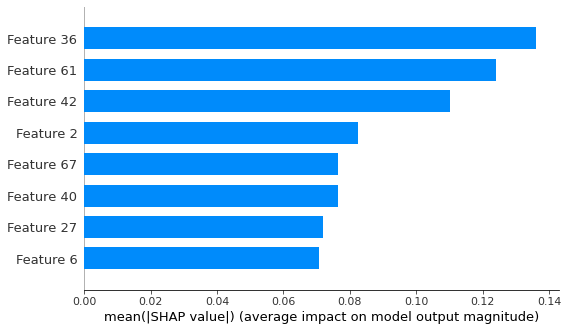

In [31]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=8)

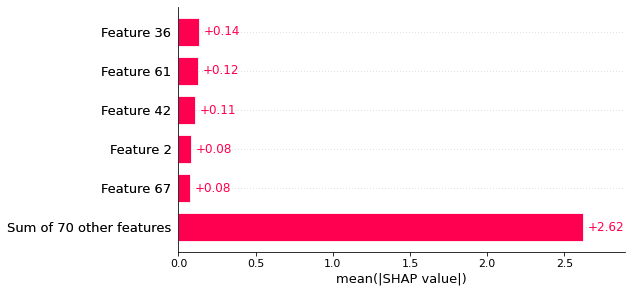

In [32]:
shap.plots.bar(shap_values,max_display=6)

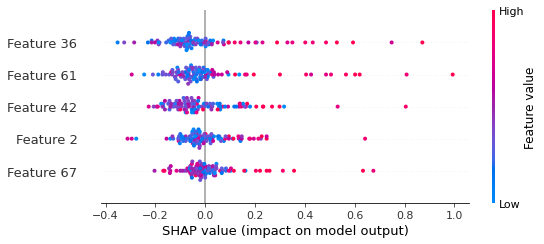

In [33]:
shap.summary_plot(shap_values,max_display=5)

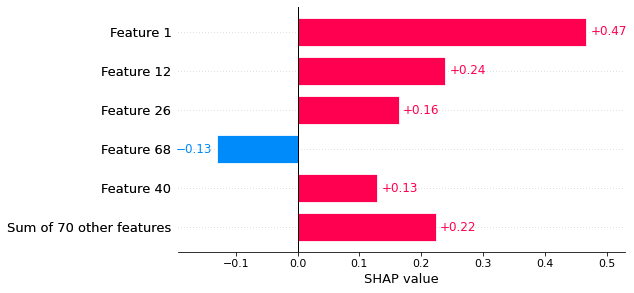

In [34]:
shap.plots.bar(shap_values[1],max_display=6)

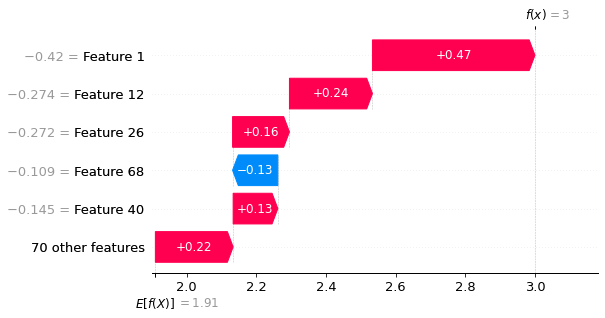

In [35]:
shap.plots.waterfall(shap_values[1],max_display=6)

In [36]:
shap.initjs()
shap.plots.force(shap_values[0])


---



In [37]:
explainer = shap.TreeExplainer(rf)

start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [38]:
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index])

The RF predicted: 3


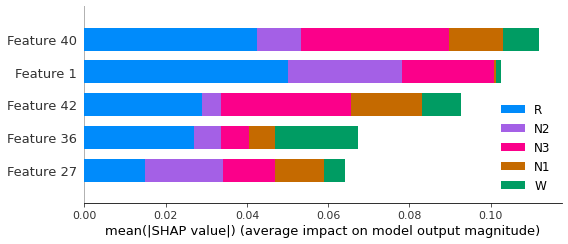

In [40]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=["N1","N2","N3","R","W"],max_display=5)